In [12]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [13]:
import numpy as np

In [14]:
import pandas as pd

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
from scipy.stats import zscore

In [17]:
import seaborn as sns

In [18]:
# A small function to compare predicted values with actual and count how many are correct

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] is predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [19]:
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')

# weights :  optional (default = ‘uniform’)
#weight function used in prediction. Possible values:
#‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# distance measures can be P=1 manhattan, P=2 Euclidian 

In [20]:
bc_df = pd.read_csv("wisc_bc_data.csv")

In [21]:
bc_df.shape

(569, 32)

In [22]:
bc_df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [23]:
bc_df['diagnosis'] = bc_df.diagnosis.astype('category')
bc_df.dtypes
bc_df.describe()


id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  points_mean  \
count       569.000000        569.000000      569.000000   569.000000   
mean          0.096360          0.104341        0.088799     0.048919   
std           0.014064          0.052813        0.079720     0.038803   
min           0.052630          0.019380        0.000000     0.000000   
25%           0.086370          0.064920        0.029560     0.020310   
50%           0.095870          0.092630        0.061540     0.033500   
75%           0.105300          0.130400        0.130700     0.074000   
max           0.163400          0.345400        0.426800     0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       points_worst  symmetry_worst  dimension_worst  
count    569.000000      569.000000       569.000000  
mean       0.114606        0.290076         0.083946  
std        0.065732        0.061867         0.018061  
min        0.000000        0.156500         0.055040  
25%        0.064930        0.250400         0.071460  
50%        0.099930        0.282200         0.080040  
75%        0.161400        0.317900         0.092080  
max        0.291000        0.663800         0.207500  

[8 rows x 31 columns]

In [24]:
bc_df.groupby(["diagnosis"]).count()

# Class distribution among B and M is almost 2:1. The model will better predict B and M

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                              
B          357          357           357             357        357   
M          212          212           212             212        212   

           smoothness_mean  compactness_mean  concavity_mean  points_mean  \
diagnosis                                                                   
B                      357               357             357          357   
M                      212               212             212          212   

           symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
diagnosis                 ...                                                 
B                    357  ...           357            357              357   
M                    212  ...           212            212              212   

           area_worst  smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                                     
B                 357               357                357              357   
M                 212               212                212              212   

           points_worst  symmetry_worst  dimension_worst  
diagnosis                                                 
B                   357             357              357  
M                   212             212              212  

[2 rows x 31 columns]

drop the first column from the data frame. This is Id column which is not used in modeling

In [25]:
# The first column is id column which is patient id and nothing to do with the model attriibutes. So drop it.

bc_df = bc_df.drop(labels = "id", axis = 1)

In [26]:
# Create a separate dataframe consisting only of the features i.e independent attributes

bc_feature_df = bc_df.drop(labels= "diagnosis" , axis = 1)

In [27]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

bc_feature_df_z = bc_feature_df.apply(zscore)  # convert all attributes to Z scale 

In [28]:
# Capture the class values from the 'diagnosis' column into a pandas series akin to array 

bc_labels = bc_df["diagnosis"]

In [29]:
# store the normalized features data into np array 

X = np.array(bc_feature_df_z)

In [30]:
# store the bc_labels data into a separate np array

Y = np.array(bc_labels)

In [31]:
# Break the data into training and test set

X_Train = X[ :400, :]

In [32]:
X_Test = X[401: , :]

In [33]:
# break the Y into training and test set labels
Y_Train = Y[:400, ]

In [34]:
Y_Test = Y[401:, ]

In [35]:
# Call Nearest Neighbour algorithm

NNH.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [36]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_Test)

In [37]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

accuracy_score = getAccuracy(Y_Test, predicted_labels)

In [38]:
print(accuracy_score)

95.83333333333334


In [39]:
# To improve performance ------------------------- Iteration 2 -----------------------------------


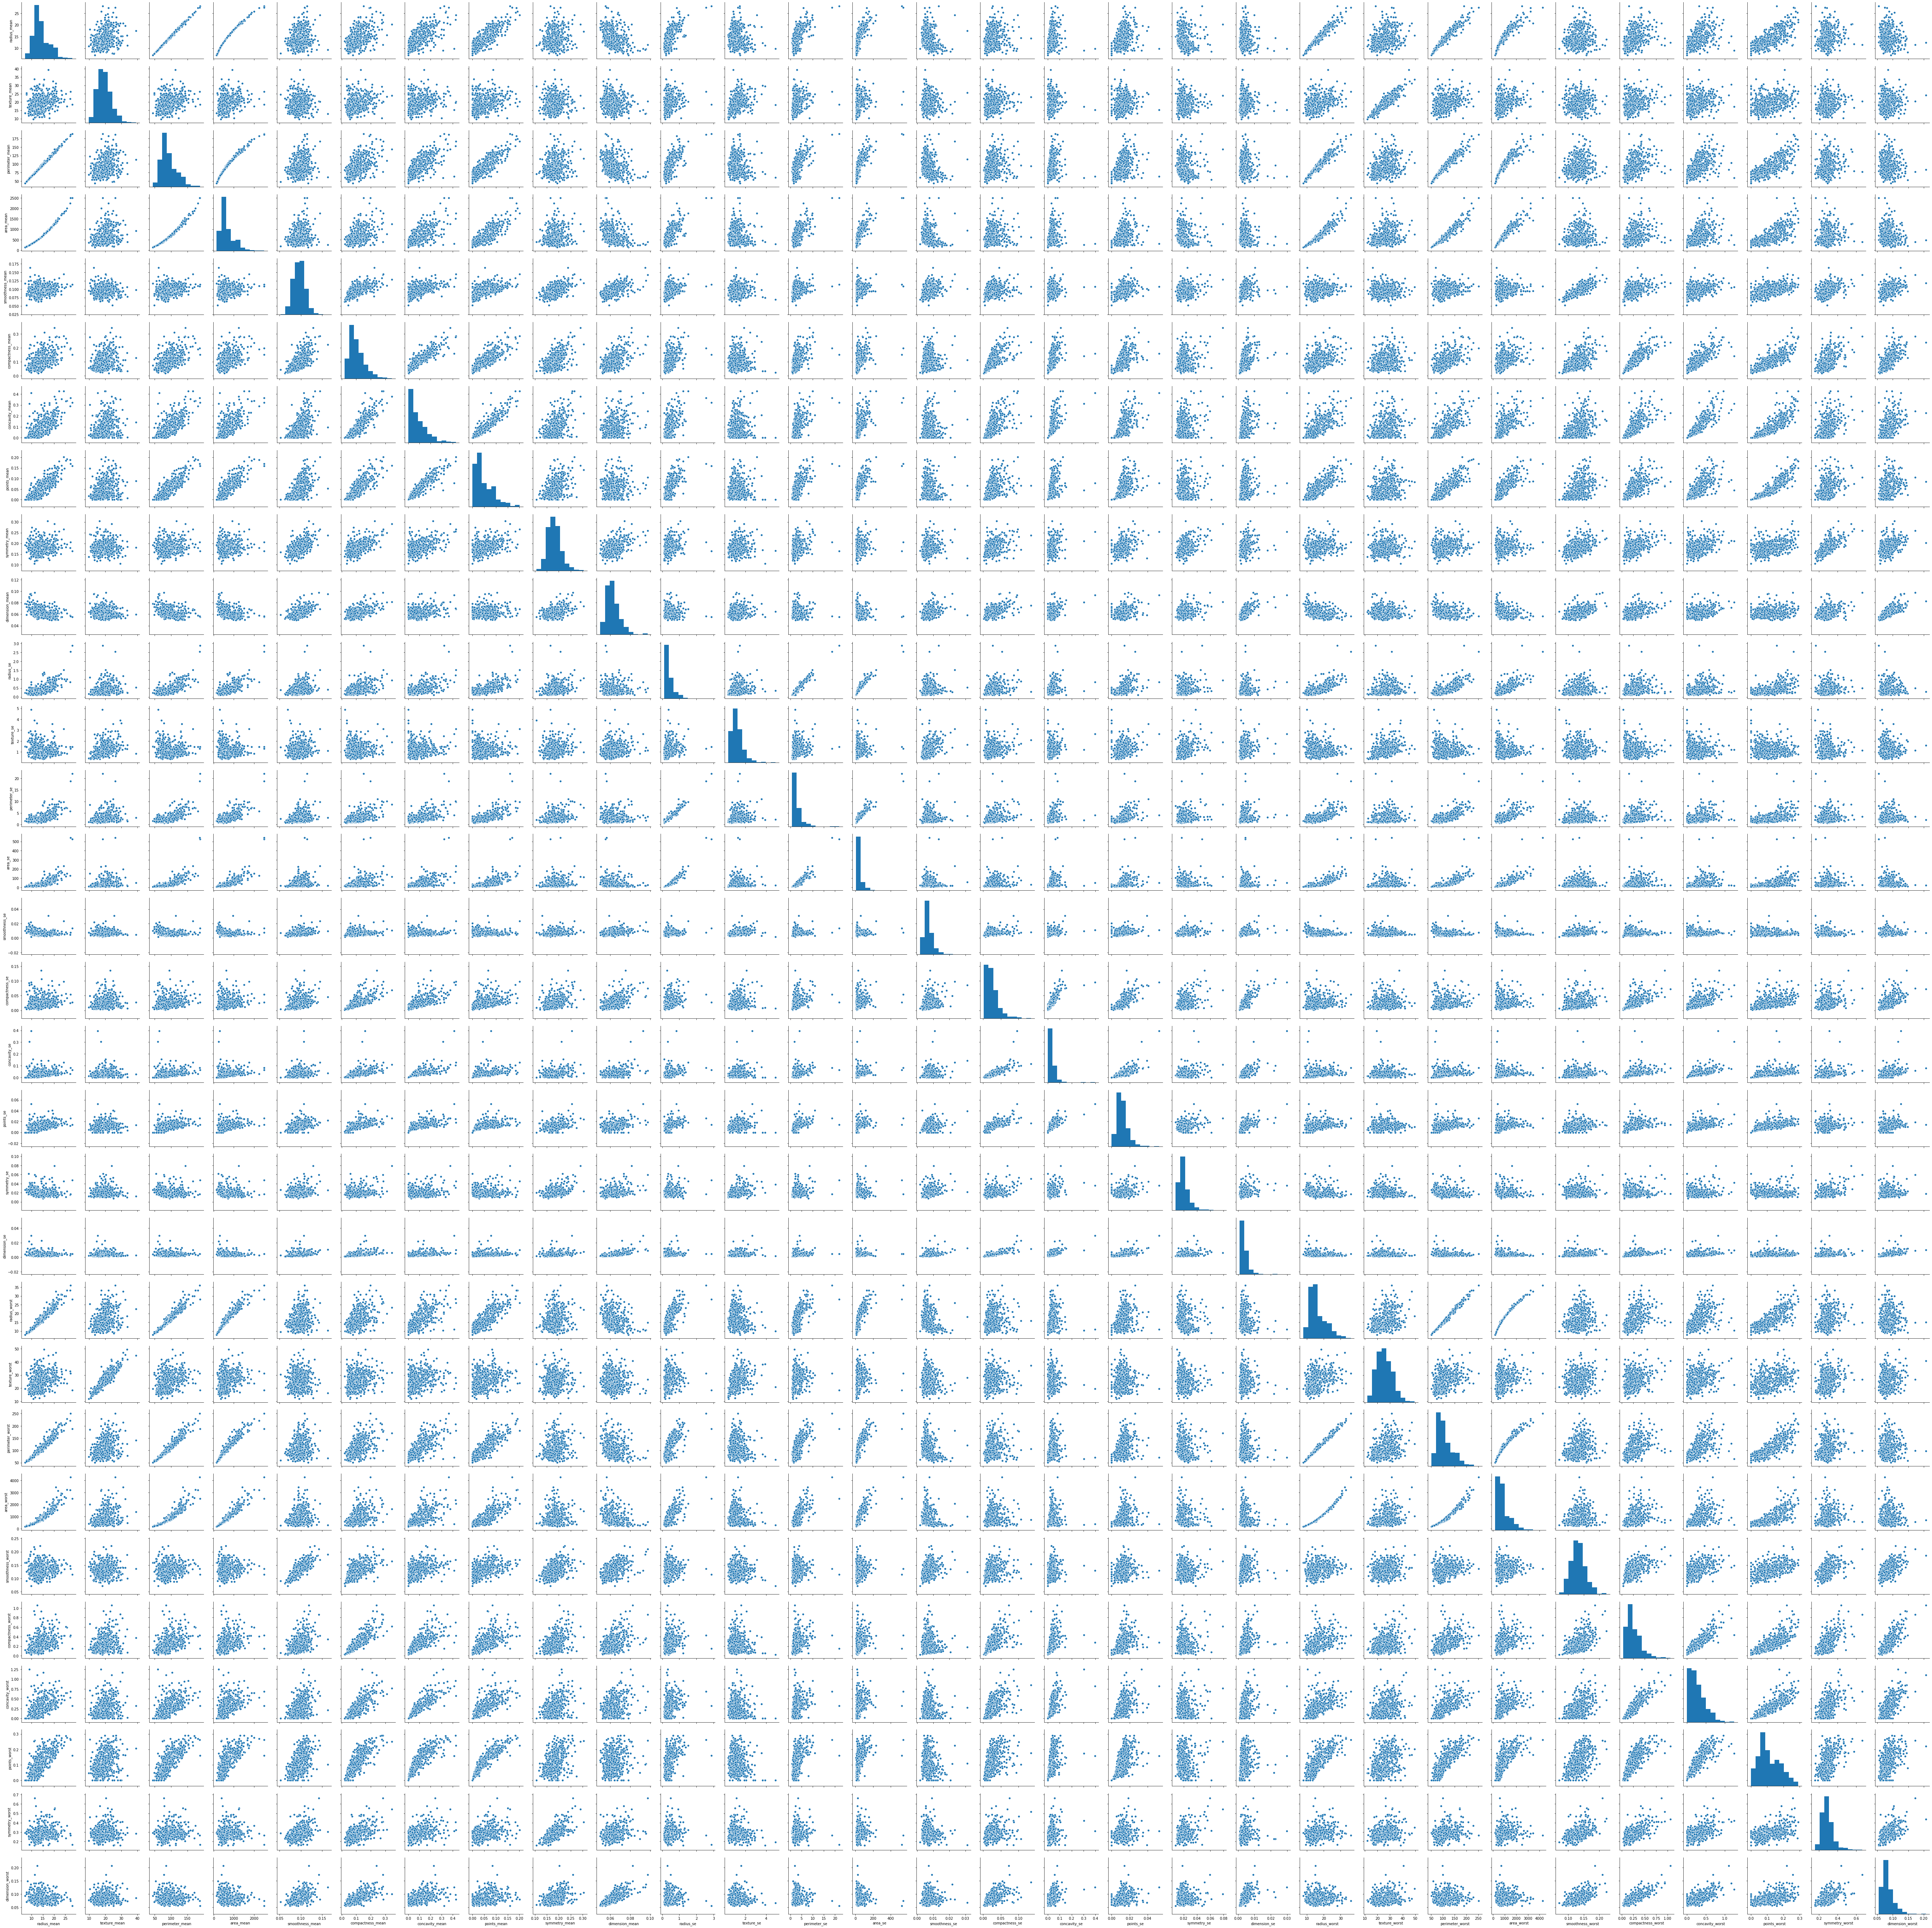

In [40]:
# Let us analyze the different attributes for distribution and the correlation by using scatter matrix

sns.pairplot(bc_df)

In [41]:
# As is evident from the scatter matrix, many dimensions have strong correlation and that is not surprising
# Area and Perimeter are function of radius, so they will have strong correlation. Why take multiple dimensions 
# when they convey the same information to the model?

In [42]:
# To to drop dependent columns from bc_df

bc_features_pruned_df_z =  bc_feature_df_z.drop(['perimeter_mean', 'area_mean'], axis=1)

In [43]:
X = np.array(bc_features_pruned_df_z)

In [44]:
# Break the data into training and test set

X_Train = X[ :400, :]

In [45]:
X_Test = X[401: , :]

In [46]:
# Call Nearest Neighbour algorithm

NNH.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [47]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_Test)

In [48]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

accuracy_score = getAccuracy(Y_Test, predicted_labels)

In [49]:
print(accuracy_score)

96.42857142857143


In [50]:
#cross tab